# Model Evaluation Notebook

In [1]:
import os
import sys

%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

import torch

sys.path.insert(0, 'models')

import pickle

In [2]:
lms_files = [os.path.join("sequences", file) for file in os.listdir("sequences") if ".ipynb" not in file and ".DS_Store" not in file]
lms_files.sort()
mp3_files = [os.path.join("audio", file) for file in os.listdir("audio") if ".ipynb" not in file and ".DS_Store" not in file]
mp3_files.sort()

## Import Model Architecture and Pre-Trained Weights

In [3]:
from exp2 import *

model = SimpleLinear()
model.load_state_dict(torch.load("weights/exp2.pt"))
model.eval()

SimpleLinear(
  (activation): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (linear1): Linear(in_features=68, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=256, bias=True)
  (linear3): Linear(in_features=256, out_features=64, bias=True)
  (linear4): Linear(in_features=64, out_features=48, bias=True)
)

In [4]:
from LOR_dataset import LOR_Dataset

In [6]:
with open('datasets/dataset_1.pickle', 'rb') as file:
    dataset = pickle.load(file)

In [13]:
valid_dataset = torch.utils.data.Subset(dataset, np.arange(np.sum(dataset.file_lengths[:10]), np.sum(dataset.file_lengths[:11])))

In [19]:
song_prediction = np.empty([len(valid_dataset), 48])
for idx in range(len(valid_dataset)):
    song_prediction[idx] = model(valid_dataset[idx][0]).detach().numpy()

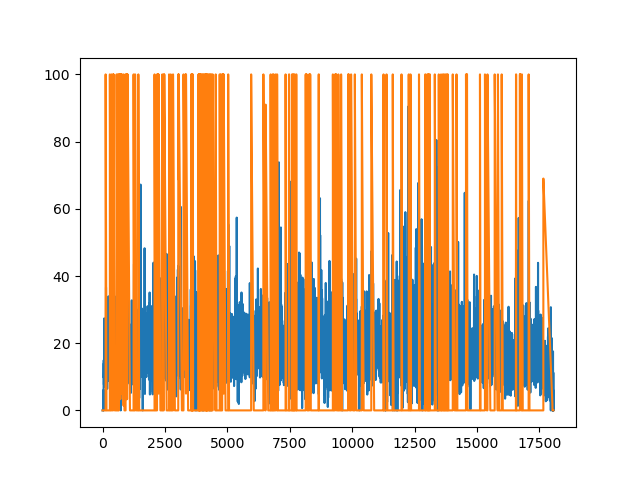

In [25]:
fig, ax = plt.subplots()
ax.plot(song_prediction[:, 2])
ax.plot([idx[1][2] for idx in valid_dataset])

In [28]:
train_dataset = torch.utils.data.Subset(dataset, np.arange(np.sum(dataset.file_lengths[:1])))

In [29]:
song_prediction = np.empty([len(train_dataset), 48])
for idx in range(len(train_dataset)):
    song_prediction[idx] = model(train_dataset[idx][0]).detach().numpy()

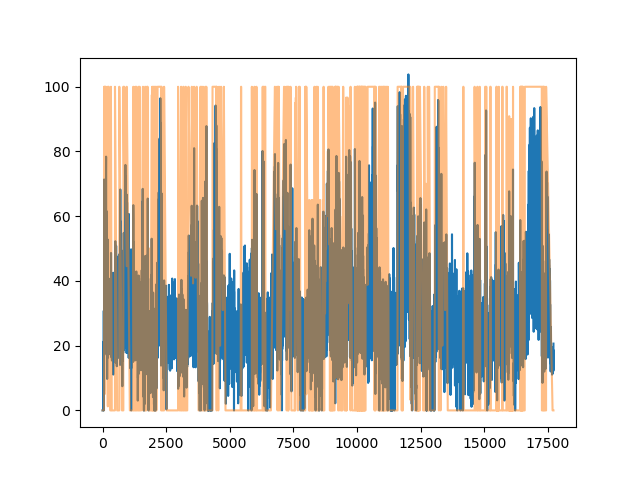

In [31]:
fig, ax = plt.subplots()
ax.plot(song_prediction[:, 0])
ax.plot([idx[1][0] for idx in train_dataset], alpha=0.5)